In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv("MPs dataset.csv", sep = ";")

In [4]:
df.head()

,Sno,Division_SeatNo,Member_ID,Session,State,Constituency,Total_Sittings,Sittings_Attended,Zone,Percent_Attendance,Exp_status,If_Numeric_Percent_Attendance
0,1,2,MP1,13,Maharashtra ...,Solapur,32,0,Central,0.0%,Unexp,0
1,2,3,MP2,13,Uttar Pradesh ...,Rae Barelii,32,18,North,56.3%,Exp,1
2,3,15,MP3,13,Tamil Nadu ...,Chennai Central,32,19,South,59.4%,Exp,1
3,4,16,MP4,13,Tamil Nadu ...,Nilgiris,32,23,South,71.9%,Unexp,1
4,5,20,MP5,13,Tamil Nadu ...,Madurai,32,0,South,0.0%,Exp,0


In [7]:
df.columns

Index(['Sno', 'Division_SeatNo', 'Member_ID', 'Session', 'State',
       'Constituency', 'Total_Sittings', 'Sittings_Attended', 'Zone',
       'Percent_Attendance', 'Exp_status', 'If_Numeric_Percent_Attendance'],
      dtype='object')

In [8]:
df['If_Numeric_Percent_Attendance'].value_counts()

1    369
0    116
Name: If_Numeric_Percent_Attendance, dtype: int64

In [9]:
df['Zone'].value_counts()

South      113
East       111
North      109
Central     83
West        45
NE          24
Name: Zone, dtype: int64

In [66]:
df2 = df.groupby(['Zone', 'If_Numeric_Percent_Attendance'])

In [70]:
df2 = df2.size().unstack()

In [71]:
#observed value
df2                     

If_Numeric_Percent_Attendance,0,1
Zone,,
Central,17,66
East,23,88
NE,10,14
North,19,90
South,35,78
West,12,33


#### chi_square test 

In [72]:
chi2_contingency(df2)                           #there is relation b/w zone and attendance

(11.115347431439105,
 0.04914034426705168,
 5,
 array([[19.85154639, 63.14845361],
        [26.54845361, 84.45154639],
        [ 5.74020619, 18.25979381],
        [26.07010309, 82.92989691],
        [27.02680412, 85.97319588],
        [10.7628866 , 34.2371134 ]]))

In [73]:
exp_df2 = pd.DataFrame(chi2_contingency(df2)[3], index = ['Central', 'East','NE', 'North', 'South', 'West'], columns = ['0', '1'])

In [74]:
#expected value
exp_df2

,0,1
Central,19.851546,63.148454
East,26.548454,84.451546
NE,5.740206,18.259794
North,26.070103,82.929897
South,27.026804,85.973196
West,10.762887,34.237113


In [76]:
chisquare = chi2_contingency(df2)[0]
chisquare

11.115347431439105

\begin{equation}
\chi^2=\Sigma\frac{(O-E)^2}{E} \\
\text{where O is the actual value and E is the expected value.}
\end{equation}

In [78]:
df_state = df.groupby(['State', 'If_Numeric_Percent_Attendance']).size().unstack()

In [79]:
df_state

If_Numeric_Percent_Attendance,0,1
State,,
Andaman and Nicobar Islands,NaN,1.0
Andhra Pradesh,7.0,25.0
Arunachal Pradesh,1.0,1.0
Assam,5.0,8.0
Bihar,2.0,36.0
Chhattisgarh,3.0,7.0
Dadra and Nagar Haveli,1.0,NaN
Daman and Diu,NaN,1.0
Delhi,2.0,2.0


In [80]:
df_state = df_state.dropna()

In [81]:
df_state

If_Numeric_Percent_Attendance,0,1
State,,
Andhra Pradesh,7.0,25.0
Arunachal Pradesh,1.0,1.0
Assam,5.0,8.0
Bihar,2.0,36.0
Chhattisgarh,3.0,7.0
Delhi,2.0,2.0
Goa,1.0,1.0
Gujarat,5.0,16.0
Haryana,1.0,7.0


In [82]:
chi2_contingency(df_state)                        # there is relation b/w state and attendance

(41.93500308551987,
 0.004287601684935975,
 21,
 array([[ 7.60599572, 24.39400428],
        [ 0.47537473,  1.52462527],
        [ 3.08993576,  9.91006424],
        [ 9.03211991, 28.96788009],
        [ 2.37687366,  7.62312634],
        [ 0.95074946,  3.04925054],
        [ 0.47537473,  1.52462527],
        [ 4.99143469, 16.00856531],
        [ 1.90149893,  6.09850107],
        [ 0.7130621 ,  2.2869379 ],
        [ 3.08993576,  9.91006424],
        [ 5.94218415, 19.05781585],
        [ 3.80299786, 12.19700214],
        [ 6.17987152, 19.82012848],
        [10.69593148, 34.30406852],
        [ 4.75374732, 15.24625268],
        [ 2.61456103,  8.38543897],
        [ 5.22912206, 16.77087794],
        [ 9.03211991, 28.96788009],
        [17.35117773, 55.64882227],
        [ 1.18843683,  3.81156317],
        [ 9.50749465, 30.49250535]]))

In [83]:
df_exp = df.groupby(['Exp_status', 'If_Numeric_Percent_Attendance']).size().unstack()
df_exp

If_Numeric_Percent_Attendance,0,1
Exp_status,,
Exp,77,274
Unexp,39,95


In [84]:
chi2_contingency(df_exp)                # No relation b/w exp_status and attendance

(2.357858762707459,
 0.12465318379361706,
 1,
 array([[ 83.95051546, 267.04948454],
        [ 32.04948454, 101.95051546]]))

In [87]:
#with 95% confidence, null hypothesis is rejected
from scipy.stats import chi2
significance = 0.05
p = 1 - significance
dof = chi2_contingency(df2)[2]
critical_value = chi2.ppf(p, dof)
critical_value

11.070497693516351

In [136]:
df_north = df[df['Zone'] == 'North'].groupby(['Zone', 'Exp_status', 'If_Numeric_Percent_Attendance']).size().unstack()
df_north

If_Numeric_Percent_Attendance   0   1
Zone  Exp_status                     
North Exp                      11  62
      Unexp                     8  28

In [92]:
chi2_contingency(df_north)       #failed to reject and attendance is same for both exp and non-exp

(0.4322824040695346,
 0.510871127342392,
 1,
 array([[12.72477064, 60.27522936],
        [ 6.27522936, 29.72477064]]))

In [94]:
import seaborn as sns

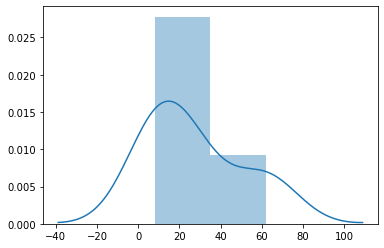

In [95]:
sns.distplot(df_north)

In [97]:
from scipy import stats
from statsmodels.stats import weightstats as stests

### paired t-test

In [115]:
# Null hypothesis failed to reject, there is no relation b/w exp and unexp MPs with attendance
ttest,pval = stats.ttest_rel(df_north[0], df_north[1])
if pval < 0.05:
    print("Null Hypothesis is rejected", pval)
else:
    print("Null Hypothesis is failed to reject", pval)

Null Hypothesis is failed to reject 0.26207811694586924


In [137]:
df_north = df_north.reset_index()

In [138]:
df_north

If_Numeric_Percent_Attendance,Zone,Exp_status,0,1
0,North,Exp,11,62
1,North,Unexp,8,28


In [144]:
df_north_sitting = df[df['Zone'] == 'North'].groupby(['Zone', 'Sittings_Attended', 'Exp_status']).size().unstack()
df_north_sitting

Exp_status               Exp  Unexp
Zone  Sittings_Attended            
North 0                  NaN    2.0
      6                  NaN    1.0
      7                  2.0    NaN
      10                 1.0    NaN
      11                 1.0    NaN
      13                 1.0    NaN
      15                 1.0    NaN
      16                 NaN    1.0
      17                 NaN    1.0
      18                 2.0    NaN
      19                 3.0    NaN
      20                 3.0    1.0
      21                 2.0    2.0
      22                 4.0    1.0
      23                 2.0    NaN
      24                 4.0    2.0
      25                 3.0    2.0
      26                 4.0    1.0
      27                 6.0    3.0
      28                 6.0    5.0
      29                 8.0    3.0
      30                 8.0    2.0
      31                 7.0    4.0
      32                 5.0    5.0

In [148]:
df_north_sitting = df_north_sitting.dropna()

In [149]:
df_north_sitting

Exp_status               Exp  Unexp
Zone  Sittings_Attended            
North 20                 3.0    1.0
      21                 2.0    2.0
      22                 4.0    1.0
      24                 4.0    2.0
      25                 3.0    2.0
      26                 4.0    1.0
      27                 6.0    3.0
      28                 6.0    5.0
      29                 8.0    3.0
      30                 8.0    2.0
      31                 7.0    4.0
      32                 5.0    5.0

In [150]:
ttest,pval1 = stats.ttest_rel(df_north_sitting['Exp'], df_north_sitting['Unexp'])
if pval1 < 0.05:
    print("Null Hypothesis is rejected", pval1)
else:
    print("Null Hypothesis is failed to reject", pval1)

Null Hypothesis is rejected 0.0008037066316714781


In [151]:
chi2_contingency(df_north_sitting)

(4.459637504072988,
 0.9544963973248446,
 11,
 array([[2.63736264, 1.36263736],
        [2.63736264, 1.36263736],
        [3.2967033 , 1.7032967 ],
        [3.95604396, 2.04395604],
        [3.2967033 , 1.7032967 ],
        [3.2967033 , 1.7032967 ],
        [5.93406593, 3.06593407],
        [7.25274725, 3.74725275],
        [7.25274725, 3.74725275],
        [6.59340659, 3.40659341],
        [7.25274725, 3.74725275],
        [6.59340659, 3.40659341]]))

In [153]:
from scipy.stats import chi2
significance = 0.05
p = 1 - significance
dof = chi2_contingency(df_north_sitting)[2]
critical_value = chi2.ppf(p, dof)
critical_value

19.67513757268249